In [1]:
# necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline

<a href="https://www.kaggle.com/niteshyadav3103/red-wine-quality-classification">Link</a>

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# let's see how data is distributed for every column

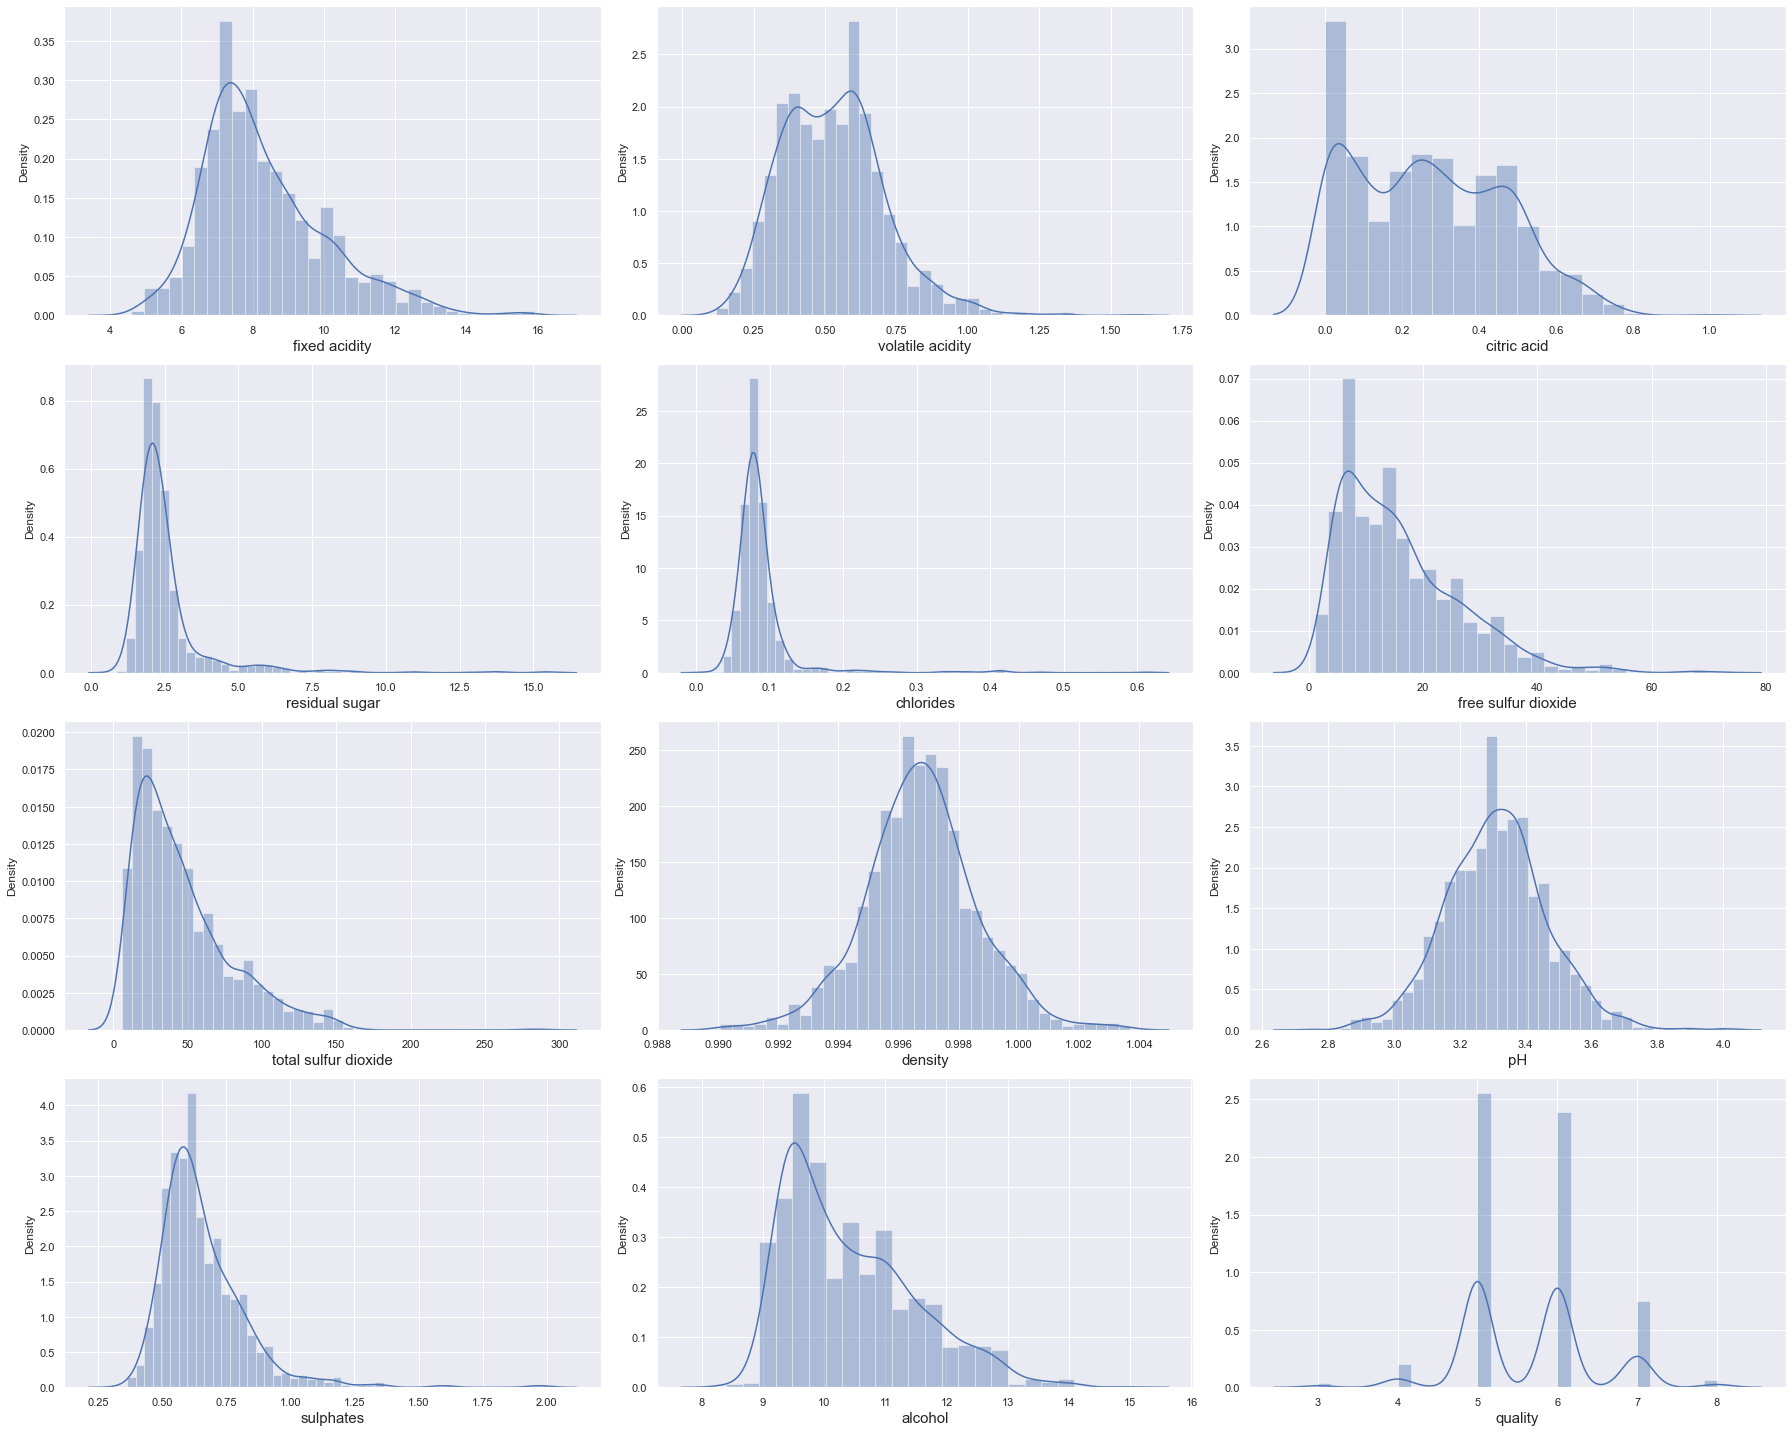

In [7]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in df:
    if plotnumber <= 12:
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

# Heatmap

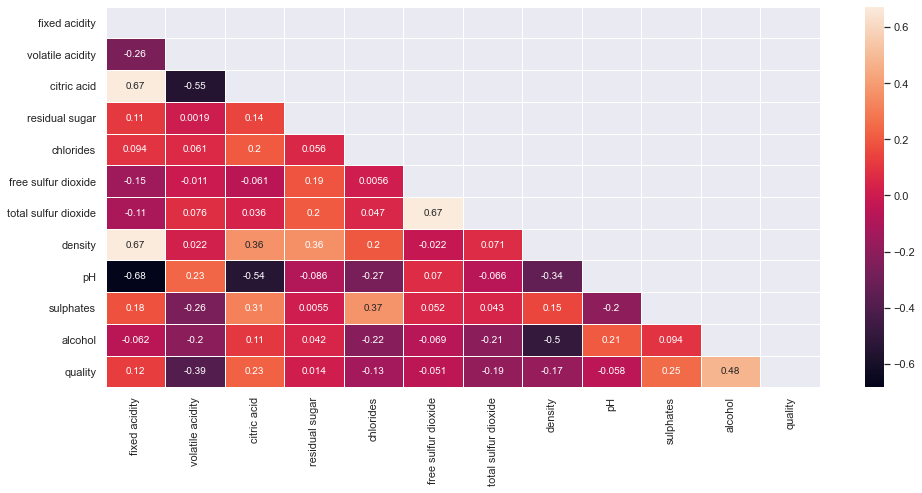

In [8]:
plt.figure(figsize = (16, 7))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, annot = True, fmt = '0.2g', linewidths = 1)
plt.show()

# creating X and y

In [9]:
X = df.drop('quality', axis = 1)
y = df['quality']

# splitting data into training and test set

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y)

# scaling data

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
lr.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [13]:
# accuracy score

from sklearn.metrics import accuracy_score

lr_acc = accuracy_score(y_test, lr.predict(X_test))
print(f"Accuracy Score of Training Data is {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Accuracy Score of Training Data is {lr_acc}\n")

Accuracy Score of Training Data is 0.6138448707256047
Accuracy Score of Training Data is 0.5975



# KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
# accuracy score

knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(f"Accuracy Score of Training Data is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Accuracy Score of Training Data is {knn_acc}\n")

Accuracy Score of Training Data is 0.6805671392827356
Accuracy Score of Training Data is 0.5725



# SVC

In [16]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [17]:
# accuracy score

svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(f"Accuracy Score of Training Data is {accuracy_score(y_train, svc.predict(X_train))}")
print(f"Accuracy Score of Training Data is {svc_acc}\n")

Accuracy Score of Training Data is 0.6797331109257715
Accuracy Score of Training Data is 0.6325



# SGD Classifier

In [18]:
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import GridSearchCV

sgd = SGDClassifier()
parameters = {
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1],
    'loss' : ['hinge', 'log'],
    'penalty' : ['l1', 'l2']
}

grid_search = GridSearchCV(sgd, parameters, cv = 10, n_jobs = -1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'loss': ['hinge', 'log'], 'penalty': ['l1', 'l2']})

In [19]:
# best parameter and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'alpha': 0.01, 'loss': 'log', 'penalty': 'l2'}
0.5914005602240897


In [20]:
sgd = SGDClassifier(alpha = 0.01, loss = 'log', penalty = 'l2')
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print(accuracy_score(y_train, sgd.predict(X_train)))

sgd_acc = accuracy_score(y_test, sgd.predict(X_test))
print(sgd_acc)

0.6021684737281068
0.59


# Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
# accuracy score

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(f"Accuracy Score of Training Data is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Accuracy Score of Training Data is {dtc_acc}\n")

Accuracy Score of Training Data is 1.0
Accuracy Score of Training Data is 0.5825



# Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
# accuracy score

rf_acc = accuracy_score(y_test, rf.predict(X_test))
print(f"Accuracy Score of Training Data is {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Accuracy Score of Training Data is {rf_acc}\n")

Accuracy Score of Training Data is 1.0
Accuracy Score of Training Data is 0.68



# Ada Boost Classifier

In [25]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

In [26]:
# accuracy score

ada_acc = accuracy_score(y_test, ada.predict(X_test))
print(f"Accuracy Score of Training Data is {accuracy_score(y_train, ada.predict(X_train))}")
print(f"Accuracy Score of Training Data is {ada_acc}\n")

Accuracy Score of Training Data is 1.0
Accuracy Score of Training Data is 0.5825



In [27]:
# hyper parameter tuning using grid search cv

grid_param = {
    'n_estimators' : [40, 50, 70, 80, 100],
    'learning_rate' : [0.01, 0.1, 0.05, 0.5, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 0.05, 0.5, 1, 10],
                         'n_estimators': [40, 50, 70, 80, 100]},
             verbose=1)

In [28]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 80}
0.5880334728033473


In [29]:
ada = AdaBoostClassifier(base_estimator = ada, algorithm = 'SAMME.R', learning_rate = 1, n_estimators = 100)
ada.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
                   learning_rate=1, n_estimators=100)

In [30]:
# accuracy score

ada_acc = accuracy_score(y_test, ada.predict(X_test))
print(f"Accuracy Score of Training Data is {accuracy_score(y_train, ada.predict(X_train))}")
print(f"Accuracy Score of Training Data is {ada_acc}\n")

Accuracy Score of Training Data is 1.0
Accuracy Score of Training Data is 0.565



# Gradient Boosting Classifier

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [32]:
# accuracy score

gb_acc = accuracy_score(y_test, gb.predict(X_test))
print(f"Accuracy Score of Training Data is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Accuracy Score of Training Data is {gb_acc}\n")

Accuracy Score of Training Data is 0.9032527105921602
Accuracy Score of Training Data is 0.655



# Stochastic Gradient Boosting (SGB)

In [33]:
sgb = GradientBoostingClassifier(subsample = 0.9, max_features = 0.8)
sgb.fit(X_train, y_train)

GradientBoostingClassifier(max_features=0.8, subsample=0.9)

In [34]:
# accuracy score

sgb_acc = accuracy_score(y_test, sgb.predict(X_test))
print(f"Accuracy Score of Training Data is {accuracy_score(y_train, sgb.predict(X_train))}")
print(f"Accuracy Score of Training Data is {sgb_acc}\n")

Accuracy Score of Training Data is 0.908256880733945
Accuracy Score of Training Data is 0.6275



# XgBoost

In [35]:
from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate = 0.1, loss = 'deviance', n_estimators = 100)
xgb.fit(X_train, y_train)

[04:43:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "loss" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[04:43:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, loss='deviance', max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=6, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
# accuracy score

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

print(f"Accuracy Score of Training Data is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Accuracy Score of Training Data is {xgb_acc}\n")

Accuracy Score of Training Data is 0.9983319432860718
Accuracy Score of Training Data is 0.6725



# Light Gradient Boosting Classifier

In [37]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)

lgbm_acc = accuracy_score(y_test, lgbm.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, lgbm.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {lgbm_acc} \n")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.685 



# Cat Boost Classifier

In [38]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier()
cat.fit(X_train, y_train)

Learning rate set to 0.079863
0:	learn: 1.6917472	total: 161ms	remaining: 2m 40s
1:	learn: 1.6072604	total: 184ms	remaining: 1m 31s
2:	learn: 1.5305948	total: 207ms	remaining: 1m 8s
3:	learn: 1.4593940	total: 218ms	remaining: 54.3s
4:	learn: 1.4051090	total: 226ms	remaining: 45s
5:	learn: 1.3576896	total: 233ms	remaining: 38.6s
6:	learn: 1.3151021	total: 239ms	remaining: 33.8s
7:	learn: 1.2749358	total: 244ms	remaining: 30.3s
8:	learn: 1.2396727	total: 249ms	remaining: 27.4s
9:	learn: 1.2081094	total: 254ms	remaining: 25.1s
10:	learn: 1.1793148	total: 258ms	remaining: 23.2s
11:	learn: 1.1545247	total: 263ms	remaining: 21.7s
12:	learn: 1.1307521	total: 269ms	remaining: 20.4s
13:	learn: 1.1081218	total: 273ms	remaining: 19.3s
14:	learn: 1.0873332	total: 278ms	remaining: 18.2s
15:	learn: 1.0689984	total: 282ms	remaining: 17.3s
16:	learn: 1.0528447	total: 286ms	remaining: 16.6s
17:	learn: 1.0372672	total: 291ms	remaining: 15.9s
18:	learn: 1.0230818	total: 295ms	remaining: 15.2s
19:	learn: 

191:	learn: 0.5316327	total: 1.08s	remaining: 4.54s
192:	learn: 0.5297513	total: 1.08s	remaining: 4.54s
193:	learn: 0.5287926	total: 1.09s	remaining: 4.53s
194:	learn: 0.5259548	total: 1.1s	remaining: 4.52s
195:	learn: 0.5245623	total: 1.1s	remaining: 4.51s
196:	learn: 0.5241189	total: 1.1s	remaining: 4.5s
197:	learn: 0.5229480	total: 1.11s	remaining: 4.5s
198:	learn: 0.5214192	total: 1.12s	remaining: 4.5s
199:	learn: 0.5184657	total: 1.12s	remaining: 4.49s
200:	learn: 0.5168862	total: 1.13s	remaining: 4.48s
201:	learn: 0.5157872	total: 1.13s	remaining: 4.47s
202:	learn: 0.5142630	total: 1.14s	remaining: 4.46s
203:	learn: 0.5126169	total: 1.14s	remaining: 4.45s
204:	learn: 0.5113069	total: 1.14s	remaining: 4.44s
205:	learn: 0.5098814	total: 1.15s	remaining: 4.43s
206:	learn: 0.5082470	total: 1.15s	remaining: 4.42s
207:	learn: 0.5067897	total: 1.16s	remaining: 4.41s
208:	learn: 0.5064064	total: 1.16s	remaining: 4.4s
209:	learn: 0.5051038	total: 1.17s	remaining: 4.39s
210:	learn: 0.50398

353:	learn: 0.3583833	total: 1.82s	remaining: 3.33s
354:	learn: 0.3580136	total: 1.83s	remaining: 3.32s
355:	learn: 0.3568874	total: 1.83s	remaining: 3.31s
356:	learn: 0.3561993	total: 1.84s	remaining: 3.31s
357:	learn: 0.3554350	total: 1.84s	remaining: 3.3s
358:	learn: 0.3552833	total: 1.85s	remaining: 3.3s
359:	learn: 0.3545763	total: 1.85s	remaining: 3.29s
360:	learn: 0.3535523	total: 1.86s	remaining: 3.29s
361:	learn: 0.3522806	total: 1.86s	remaining: 3.28s
362:	learn: 0.3516142	total: 1.86s	remaining: 3.27s
363:	learn: 0.3503594	total: 1.87s	remaining: 3.27s
364:	learn: 0.3493692	total: 1.87s	remaining: 3.26s
365:	learn: 0.3483116	total: 1.88s	remaining: 3.25s
366:	learn: 0.3476436	total: 1.88s	remaining: 3.25s
367:	learn: 0.3463208	total: 1.89s	remaining: 3.24s
368:	learn: 0.3454823	total: 1.89s	remaining: 3.23s
369:	learn: 0.3448912	total: 1.9s	remaining: 3.23s
370:	learn: 0.3439679	total: 1.9s	remaining: 3.22s
371:	learn: 0.3433998	total: 1.9s	remaining: 3.21s
372:	learn: 0.343

514:	learn: 0.2518179	total: 2.54s	remaining: 2.4s
515:	learn: 0.2511344	total: 2.55s	remaining: 2.39s
516:	learn: 0.2503380	total: 2.55s	remaining: 2.39s
517:	learn: 0.2499262	total: 2.56s	remaining: 2.38s
518:	learn: 0.2494148	total: 2.56s	remaining: 2.38s
519:	learn: 0.2490673	total: 2.57s	remaining: 2.37s
520:	learn: 0.2485979	total: 2.57s	remaining: 2.37s
521:	learn: 0.2481412	total: 2.58s	remaining: 2.36s
522:	learn: 0.2479068	total: 2.58s	remaining: 2.35s
523:	learn: 0.2471959	total: 2.59s	remaining: 2.35s
524:	learn: 0.2470440	total: 2.59s	remaining: 2.34s
525:	learn: 0.2464228	total: 2.59s	remaining: 2.34s
526:	learn: 0.2456899	total: 2.6s	remaining: 2.33s
527:	learn: 0.2451874	total: 2.6s	remaining: 2.33s
528:	learn: 0.2446545	total: 2.61s	remaining: 2.32s
529:	learn: 0.2443099	total: 2.61s	remaining: 2.32s
530:	learn: 0.2441306	total: 2.62s	remaining: 2.31s
531:	learn: 0.2439250	total: 2.62s	remaining: 2.31s
532:	learn: 0.2434642	total: 2.63s	remaining: 2.3s
533:	learn: 0.24

700:	learn: 0.1783511	total: 3.41s	remaining: 1.46s
701:	learn: 0.1780632	total: 3.42s	remaining: 1.45s
702:	learn: 0.1778046	total: 3.42s	remaining: 1.45s
703:	learn: 0.1775649	total: 3.43s	remaining: 1.44s
704:	learn: 0.1772018	total: 3.43s	remaining: 1.44s
705:	learn: 0.1770133	total: 3.44s	remaining: 1.43s
706:	learn: 0.1766065	total: 3.44s	remaining: 1.43s
707:	learn: 0.1762964	total: 3.44s	remaining: 1.42s
708:	learn: 0.1760093	total: 3.45s	remaining: 1.42s
709:	learn: 0.1756913	total: 3.45s	remaining: 1.41s
710:	learn: 0.1751432	total: 3.46s	remaining: 1.41s
711:	learn: 0.1748635	total: 3.46s	remaining: 1.4s
712:	learn: 0.1745025	total: 3.47s	remaining: 1.4s
713:	learn: 0.1740332	total: 3.47s	remaining: 1.39s
714:	learn: 0.1736355	total: 3.48s	remaining: 1.39s
715:	learn: 0.1733481	total: 3.48s	remaining: 1.38s
716:	learn: 0.1729407	total: 3.48s	remaining: 1.38s
717:	learn: 0.1726689	total: 3.49s	remaining: 1.37s
718:	learn: 0.1725504	total: 3.49s	remaining: 1.36s
719:	learn: 0.

859:	learn: 0.1375518	total: 4.16s	remaining: 677ms
860:	learn: 0.1372966	total: 4.17s	remaining: 672ms
861:	learn: 0.1370236	total: 4.17s	remaining: 668ms
862:	learn: 0.1367911	total: 4.17s	remaining: 663ms
863:	learn: 0.1364984	total: 4.18s	remaining: 658ms
864:	learn: 0.1363166	total: 4.18s	remaining: 653ms
865:	learn: 0.1361990	total: 4.19s	remaining: 648ms
866:	learn: 0.1358297	total: 4.2s	remaining: 644ms
867:	learn: 0.1356639	total: 4.2s	remaining: 639ms
868:	learn: 0.1354825	total: 4.2s	remaining: 634ms
869:	learn: 0.1353913	total: 4.21s	remaining: 629ms
870:	learn: 0.1350493	total: 4.21s	remaining: 624ms
871:	learn: 0.1348857	total: 4.22s	remaining: 619ms
872:	learn: 0.1346999	total: 4.22s	remaining: 614ms
873:	learn: 0.1345479	total: 4.23s	remaining: 609ms
874:	learn: 0.1343835	total: 4.23s	remaining: 605ms
875:	learn: 0.1341850	total: 4.24s	remaining: 600ms
876:	learn: 0.1339842	total: 4.24s	remaining: 595ms
877:	learn: 0.1336847	total: 4.25s	remaining: 590ms
878:	learn: 0.1

In [39]:
cat_acc = accuracy_score(y_test, cat.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, cat.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {cat_acc} \n")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.66 



In [40]:
cat_acc = accuracy_score(y_test, cat.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, cat.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {cat_acc} \n")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.66 



# Extra Trees Classifier

In [41]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

ExtraTreesClassifier()

In [42]:
etc_acc = accuracy_score(y_test, etc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, etc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {etc_acc} \n")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.6875 



In [43]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'SVC', 'SGD',  'Decision Tree', 'Random Forest','Ada Boost',
             'Gradient Boosting', 'SGB', 'XgBoost', 'LGBM', 'Cat Boost', 'Extra Tree'],
    'Score' : [lr_acc, knn_acc, svc_acc, sgd_acc, dtc_acc, rf_acc, ada_acc, gb_acc, sgb_acc, xgb_acc, lgbm_acc, cat_acc, etc_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
12,Extra Tree,0.6875
10,LGBM,0.6850
5,Random Forest,0.6800
9,XgBoost,0.6725
11,Cat Boost,0.6600
7,Gradient Boosting,0.6550
2,SVC,0.6325
8,SGB,0.6275
0,Logistic Regression,0.5975
3,SGD,0.5900


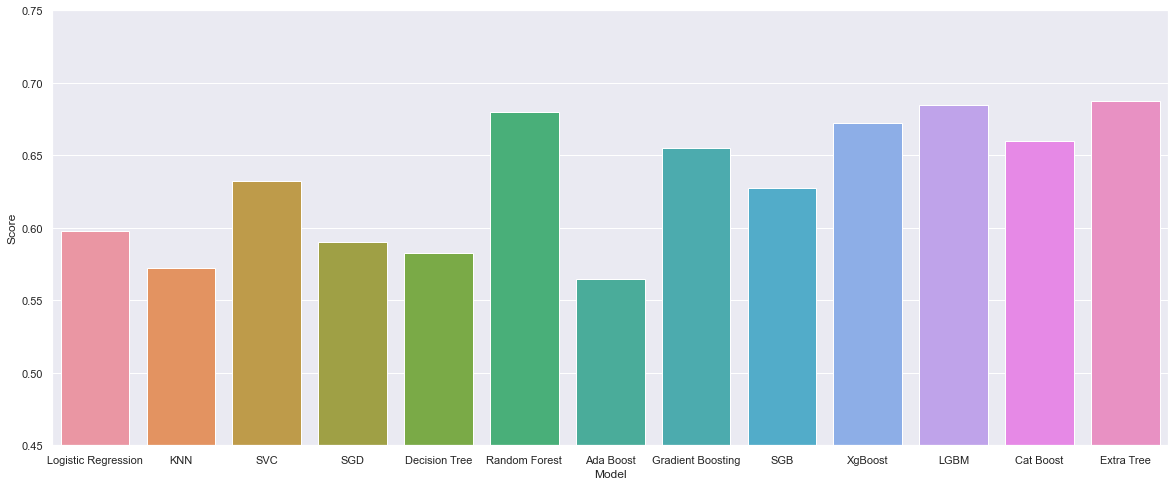

In [44]:
plt.figure(figsize = (20, 8))

sns.barplot(x = 'Model', y = 'Score', data = models)
plt.ylim(0.45, 0.75)
plt.show()

<center><h1>The End</h1></center>